# Implementing a Neural Network from Scratch in Python

### Data Generation

In [9]:
%matplotlib inline
import numpy as np
import sklearn
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

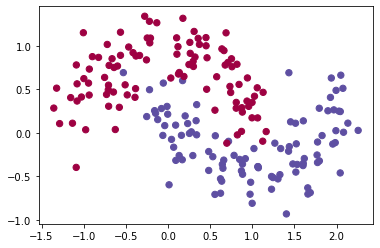

In [7]:
np.random.seed(0)
X, y = make_moons(200, noise=0.20)
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral);

Our goal is to train a Machine Learning classifier that predicts the correct class, given the x- and y- coordinates. Note that the data is not linearly separable, we can’t draw a straight line that separates the two classes. This means that linear classifiers, such as Logistic Regression, won’t be able to fit the data unless you hand-engineer non-linear features (such as polynomials) that work well for the given dataset.

In fact, that’s one of the major advantages of Neural Networks. We don’t need to worry about feature engineering. The hidden layer of a neural network will learn features for us.

### Logistic Regression

In [11]:
# Train the Logistic Regression Classifier
logreg = sklearn.linear_model.LogisticRegressionCV()
logreg.fit(X, y)

LogisticRegressionCV()

In [28]:
# Helper function to plot decision boundary
def plot_decision_boundary(pred_func):

    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    h = 0.01

    # Generate grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict function value for whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and Training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

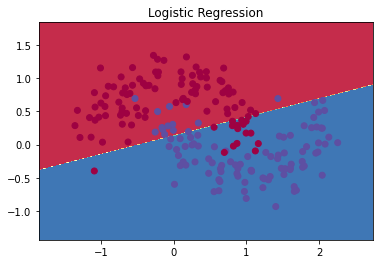

In [30]:
# Plot the decision boundary
plot_decision_boundary(lambda x:logreg.predict(x))
plt.title("Logistic Regression")